### Harvard GSD  J-Term 2022 
### Introduction to Data Science for Building Simulation and Architectural Design
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 3-7/ 10:00 - 11:30 a.m. <br>
***

Pease copy this colab notebook and rename it before you start! 

---

In [1]:
# import library
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os, random
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read multiple files

In [5]:
from os import walk
import numpy as np

mypath = '/content/drive/My Drive/Colab Notebooks/J_Term/param/'
f = []

## Read file names

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
    
print (f)

['myResult,1.txt', 'myResult,2.txt', 'myResult,3.txt', 'myResult,4.txt', 'myResult,5.txt', 'myResult,6.txt', 'myResult,7.txt', 'myResult,8.txt', 'myResult,9.txt', 'myResult,10.txt', 'myResult,11.txt']


In [6]:
## Read files
dfs = []

## Your code here
for i in f:
  fn = mypath + "/" + i
  dfs.append(pd.read_csv(fn,header=None))


In [9]:
len(dfs)

11

In [11]:
dfs[1]

,0,1,2,3
0,-19.75,-19.75,0.01,1.0
1,-19.75,-19.25,0.01,1.0
2,-19.75,-18.75,0.01,1.0
3,-19.75,-18.25,0.01,1.0
4,-19.75,-17.75,0.01,1.0
...,...,...,...,...
14395,39.75,37.75,0.01,1.0
14396,39.75,38.25,0.01,1.0
14397,39.75,38.75,0.01,1.0
14398,39.75,39.25,0.01,1.0


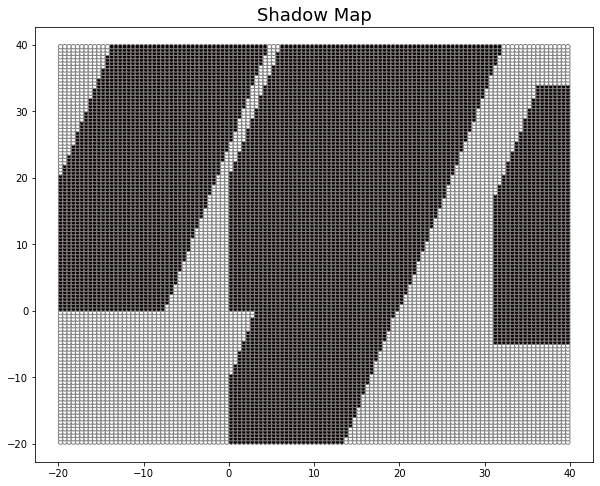

In [13]:
my_cmap = plt.cm.hot

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122)
im = ax1.scatter(dfs[0][0], dfs[0][1], 
                 s=20, c=dfs[0][3], cmap=my_cmap, edgecolors='grey')

ax1.set_title('Shadow Map', fontsize =18)

plt.show()

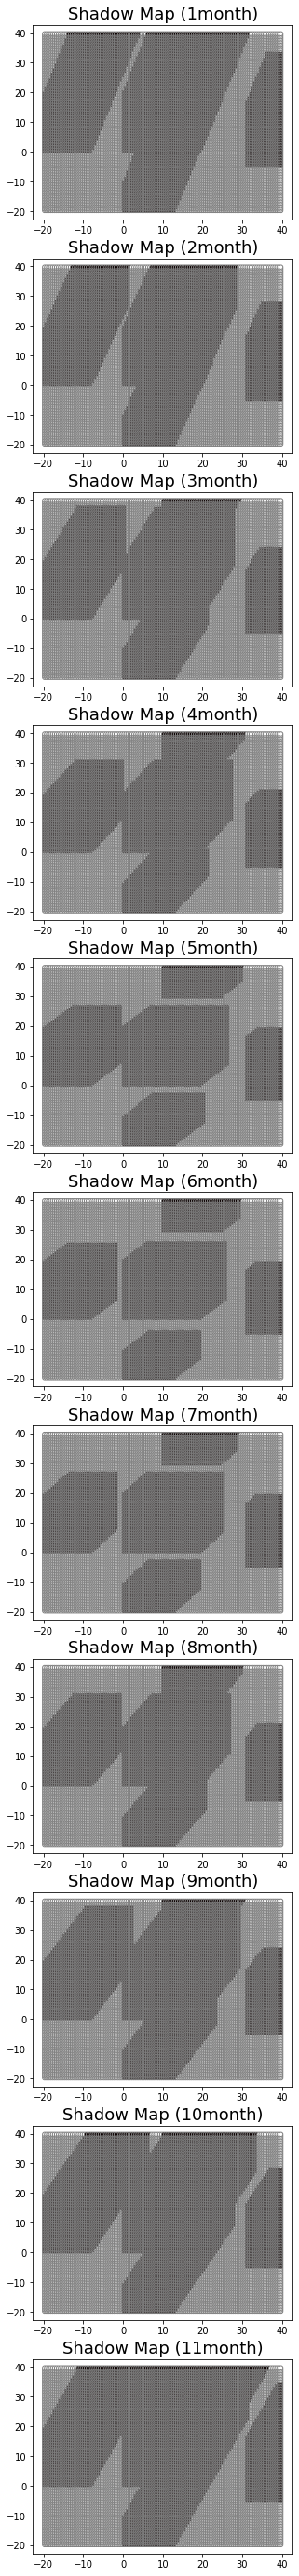

In [15]:
## Plot multiple datasets using for loop

fig, ax = plt.subplots(len(dfs), figsize=(5, 50))

## Your code here
for i in range(0,len(dfs)):
  ax[i].scatter(dfs[i][0], dfs[i][1], s=20, c=dfs[i][3], cmap=my_cmap, edgecolors='grey')
  ax[i].set_title('Shadow Map (' + str(i+1) + "month)", fontsize =18)


#Clustering

### K-means Clustering

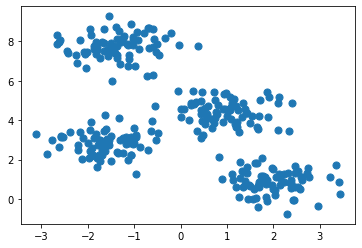

In [16]:
## Generate your sample datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [17]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [100]:
y_true

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [18]:

## K-means Set model, fit a model and predict labels

## Your Code here
km = KMeans(n_clusters=4)
km.fit(X)
y_kmeans = km.predict(X)

In [19]:
y_kmeans

array([3, 1, 2, 1, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 3, 2, 2, 3, 0, 0, 3, 3,
       2, 0, 0, 2, 3, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 2,
       0, 0, 1, 0, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 1, 3, 1, 2, 1, 0, 0, 0,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 3, 2,
       1, 1, 2, 3, 1, 0, 0, 2, 3, 3, 2, 0, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2,
       0, 0, 3, 1, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       3, 0, 1, 0, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2, 3, 2, 2, 1, 3, 2, 0, 1,
       3, 3, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 3, 3, 2,
       1, 3, 3, 0, 3, 0, 2, 1, 1, 2, 2, 1, 2, 3, 0, 2, 3, 0, 1, 0, 3, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 2, 0, 3, 2, 0, 0, 0, 3, 3, 1, 2, 2, 0, 3,
       1, 0, 2, 1, 2, 3, 3, 0, 0, 2, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3,
       1, 0, 1, 2, 3, 3, 1, 1, 1, 3, 3, 2, 1, 0], d

In [21]:
# Get the cluster centroids
print(km.cluster_centers_)
    
# Get the cluster labels
print(km.labels_)

[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]]
[3 1 2 1 3 3 0 2 1 1 0 1 2 1 3 2 2 3 0 0 3 3 2 0 0 2 3 2 0 2 1 1 2 1 1 1 1
 1 0 3 2 0 2 2 0 0 1 0 1 3 0 3 1 3 3 0 1 0 1 3 1 2 1 0 0 0 1 3 1 0 2 0 1 0
 0 1 0 2 3 1 3 2 3 3 1 2 3 2 1 1 2 3 1 0 0 2 3 3 2 0 1 3 1 3 2 3 3 2 1 2 0
 0 3 1 3 2 1 3 3 2 0 3 0 3 3 3 3 0 3 0 1 0 0 3 1 0 0 1 2 1 1 0 2 0 2 0 1 2
 1 1 1 2 1 2 3 0 1 0 3 2 1 2 2 3 2 0 0 2 3 2 2 1 3 2 0 1 3 3 2 0 3 2 0 0 2
 2 2 2 3 1 2 0 2 2 0 0 0 2 0 1 2 0 3 0 2 1 0 1 2 1 2 0 2 2 1 0 0 3 3 2 1 3
 3 0 3 0 2 1 1 2 2 1 2 3 0 2 3 0 1 0 3 2 3 1 1 1 1 0 0 1 2 0 3 2 0 0 0 3 3
 1 2 2 0 3 1 0 2 1 2 3 3 0 0 2 3 3 3 2 1 1 3 3 2 3 3 3 1 0 1 2 3 3 1 1 1 3
 3 2 1 0]


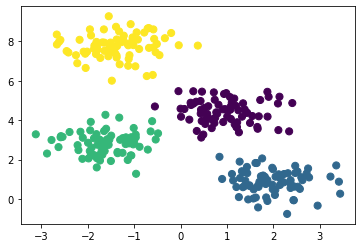

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')

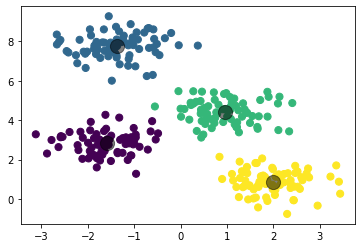

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### K-menas with non-linear boundaries

In [24]:
from sklearn.datasets import make_moons

## generate toy-data
X, y = make_moons(200, noise=.05, random_state=0)

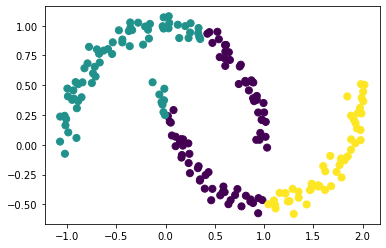

In [32]:
## Train K-means
## Your Code here

lables = KMeans(n_clusters=3).fit(X)
y_kmeans_moon = lables.predict(X)

## Visualize K-means result

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_moon,
            s=50, cmap='viridis');

In [33]:
from sklearn.metrics import accuracy_score

## your code here
## Test your model accuracy
accuracy_score(y, y_kmeans_moon)

0.225

### Support Vector Machine

In [34]:
from sklearn.svm import SVC # "Support vector classifier"

C=1E10

## SVC Set model, fit a model and predict labels with "linear" kernel
## your code here

model = SVC(kernel = "linear", C=C)
model.fit(X,y)
y_labels = model.predict(X)

In [35]:
accuracy_score(y, y_labels)

0.885

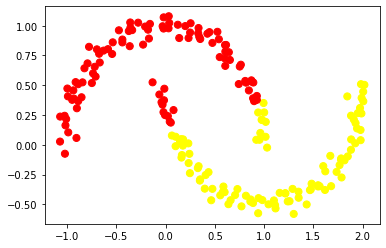

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_labels, s=50, cmap='autumn')

In [36]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

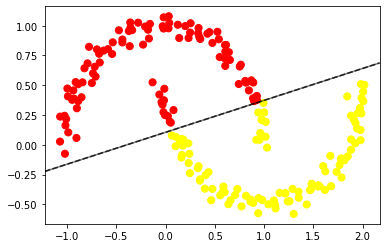

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y_labels, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [39]:
## Change kernel to radianl basis function

## your code here


rbf = SVC(kernel = "rbf", C=C)
rbf.fit(X,y)
y_pred = rbf.predict(X)


In [40]:
accuracy_score(y, y_pred)

1.0

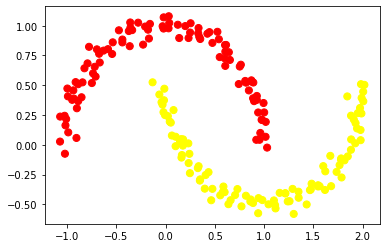

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='autumn')

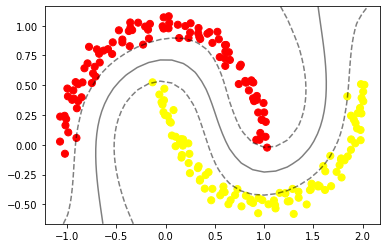

In [98]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

# Analyze and Visualize Energy Simulation Result

In [42]:
# pandas data frame from csv
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')
def getPandasFromFile(path, fileName, theSkipRow):
    path = os.path.join(path , fileName)
    return pd.read_csv(path, skiprows= theSkipRow , header=None, index_col = False)
def SavePandasToCSV(d, path):
    d.to_csv(path)
    return "done!!"

# modify the following file path for your GoogleDrive
FILEPATH = '/content/drive/My Drive/Colab Notebooks/J_Term/result/'

Result =GetPandasFromFileCSV(FILEPATH+"multizoneout.csv")

In [45]:
Result

,Date/Time,ZONE_PERI0:Zone Lights Electric Energy [J](Monthly),ZONE_PERI1:Zone Lights Electric Energy [J](Monthly),ZONE_PERI2:Zone Lights Electric Energy [J](Monthly),ZONE_PERI3:Zone Lights Electric Energy [J](Monthly),ZONE_CORE:Zone Lights Electric Energy [J](Monthly),ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly),ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly),ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly),ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly),ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly),ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly)
0,January,2.882522e+08,562446255.5,464236718.6,2.900251e+08,1505433600,0.000044,2342572413,0.000031,2179011285,0.000203,9433246797,0.000039,2257534853,1.537224e+09,4.720000e-05
1,February,1.869031e+08,347760352.0,296057707.9,1.785919e+08,1368576000,0.000061,3146837995,0.000050,2946751822,0.000199,10098992860,0.000056,3146430098,9.720578e+08,6.083658e+00
2,March,1.620329e+08,272353500.3,258378449.5,1.400399e+08,1573862400,1011.257795,4990207861,1085.069270,4603178197,1606.017036,10596541063,828.568816,4564098936,5.085119e+08,2.413533e+00
3,April,8.409551e+07,148269682.2,147264435.5,8.722369e+07,1368576000,2716.874886,6087158535,2989.402122,6053301219,3595.120451,9767607820,2134.333916,5962626319,7.381962e+05,2.810000e-08
4,May,9.259360e+07,160021079.0,161012553.0,9.442220e+07,1573862400,1345.737606,7763998576,1324.625425,8445793698,1435.755381,10614868767,893.275207,7652282295,8.430000e-06,3.228674e+08
5,June,8.880083e+07,156003241.2,157203944.3,9.184060e+07,1505433600,0.000115,7828797524,0.000115,9377882883,0.000133,10583806726,0.000121,8433266909,2.330000e-05,1.016966e+09
6,July,8.389293e+07,144470645.1,145010798.8,8.508432e+07,1437004800,0.000124,9321820937,0.000129,10846648120,0.000158,12658774583,0.000131,9322655746,3.180000e-05,1.695022e+09
7,August,9.421761e+07,161683754.3,162150521.3,9.574912e+07,1573862400,0.000083,8610472605,0.000070,9957194565,0.000122,13519640595,0.000080,8614602204,2.620000e-05,1.514184e+09
8,September,9.637661e+07,165241889.1,158860104.7,9.489405e+07,1437004800,248.816110,7303244043,311.203386,7799777145,448.219976,13685550506,252.992210,7044574024,2.270000e-05,8.159826e+08
9,October,1.739372e+08,336222977.2,283812305.6,1.739299e+08,1505433600,3302.688920,5520050095,4590.683972,6094682803,5834.399504,13206155841,3130.632238,5314780704,4.030000e-06,1.538238e+08


In [46]:
## check all columes name
Result.columns.values

array(['Date/Time', 'ZONE_PERI0:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_PERI1:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_PERI2:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_PERI3:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_CORE:Zone Lights Electric Energy [J](Monthly)',
       'ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
       'ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly)',
       'ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
       'ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly)',
       'ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
       'ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly)',
       'ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
       'ZONE_PERI3 IDEAL LO

In [48]:
## Create colume list 
ColumnsList = pd.Series(Result.columns)
ColumnsList

0                                             Date/Time
1     ZONE_PERI0:Zone Lights Electric Energy [J](Mon...
2     ZONE_PERI1:Zone Lights Electric Energy [J](Mon...
3     ZONE_PERI2:Zone Lights Electric Energy [J](Mon...
4     ZONE_PERI3:Zone Lights Electric Energy [J](Mon...
5     ZONE_CORE:Zone Lights Electric Energy [J](Mont...
6     ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zo...
7     ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zo...
8     ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zo...
9     ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zo...
10    ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zo...
11    ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zo...
12    ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zo...
13    ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zo...
14    ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zon...
15    ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zon...
dtype: object

In [49]:
## Selecting your target colume list
ZoneLightingPointList = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))])
ZoneLightingPointList

['ZONE_PERI0:Zone Lights Electric Energy [J](Monthly)',
 'ZONE_PERI1:Zone Lights Electric Energy [J](Monthly)',
 'ZONE_PERI2:Zone Lights Electric Energy [J](Monthly)',
 'ZONE_PERI3:Zone Lights Electric Energy [J](Monthly)',
 'ZONE_CORE:Zone Lights Electric Energy [J](Monthly)']

In [50]:
ZoneHeatingPointList = list(ColumnsList[(ColumnsList.str.endswith("Zone Ideal Loads Zone Total Heating Energy [J](Monthly)"))])
ZoneHeatingPointList

['ZONE_PERI0 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
 'ZONE_PERI1 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
 'ZONE_PERI2 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
 'ZONE_PERI3 IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
 'ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)']

In [46]:
CoreLightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("CORE"))])
PERI0LightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("PERI0"))])
PERI1LightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("PERI1"))])
PERI2LightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("PERI2"))])
PERI3LightingElec = list(ColumnsList[(ColumnsList.str.endswith("Zone Lights Electric Energy [J](Monthly)"))&(ColumnsList.str.contains("PERI3"))])
CoreLightingElec

['ZONE_CORE:Zone Lights Electric Energy [J](Monthly)']

In [51]:
## Apply target lists to the dataframe
ZoneLighting = Result[ZoneLightingPointList]

## Multiply numerical values to modify your list 
ZoneLighting = ZoneLighting/3600000

ZoneLighting

,ZONE_PERI0:Zone Lights Electric Energy [J](Monthly),ZONE_PERI1:Zone Lights Electric Energy [J](Monthly),ZONE_PERI2:Zone Lights Electric Energy [J](Monthly),ZONE_PERI3:Zone Lights Electric Energy [J](Monthly),ZONE_CORE:Zone Lights Electric Energy [J](Monthly)
0,80.070060,156.235071,128.954644,80.562533,418.176
1,51.917522,96.600098,82.238252,49.608874,380.160
2,45.009151,75.653750,71.771792,38.899966,437.184
3,23.359863,41.186023,40.906788,24.228802,380.160
4,25.720444,44.450300,44.725709,26.228389,437.184
5,24.666898,43.334234,43.667762,25.511278,418.176
6,23.303591,40.130735,40.280777,23.634532,399.168
7,26.171559,44.912154,45.041811,26.596977,437.184
8,26.771282,45.900525,44.127807,26.359459,399.168
9,48.315885,93.395271,78.836752,48.313850,418.176


In [53]:
## Change your dataframe colume names
ZoneLighting = ZoneLighting.rename(columns={'ZONE_PERI0:Zone Lights Electric Energy [J](Monthly)': 'ZONE_PERI0','ZONE_PERI1:Zone Lights Electric Energy [J](Monthly)': 'ZONE_PERI1','ZONE_PERI2:Zone Lights Electric Energy [J](Monthly)': 'ZONE_PERI2','ZONE_PERI3:Zone Lights Electric Energy [J](Monthly)': 'ZONE_PERI3','ZONE_CORE:Zone Lights Electric Energy [J](Monthly)': 'ZONE_CORE' })

In [54]:
ZoneLighting

,ZONE_PERI0,ZONE_PERI1,ZONE_PERI2,ZONE_PERI3,ZONE_CORE
0,80.070060,156.235071,128.954644,80.562533,418.176
1,51.917522,96.600098,82.238252,49.608874,380.160
2,45.009151,75.653750,71.771792,38.899966,437.184
3,23.359863,41.186023,40.906788,24.228802,380.160
4,25.720444,44.450300,44.725709,26.228389,437.184
5,24.666898,43.334234,43.667762,25.511278,418.176
6,23.303591,40.130735,40.280777,23.634532,399.168
7,26.171559,44.912154,45.041811,26.596977,437.184
8,26.771282,45.900525,44.127807,26.359459,399.168
9,48.315885,93.395271,78.836752,48.313850,418.176


In [55]:
## Set index
ZoneLighting.index = Result["Date/Time"]
ZoneLighting

,ZONE_PERI0,ZONE_PERI1,ZONE_PERI2,ZONE_PERI3,ZONE_CORE
Date/Time,,,,,
January,80.070060,156.235071,128.954644,80.562533,418.176
February,51.917522,96.600098,82.238252,49.608874,380.160
March,45.009151,75.653750,71.771792,38.899966,437.184
April,23.359863,41.186023,40.906788,24.228802,380.160
May,25.720444,44.450300,44.725709,26.228389,437.184
June,24.666898,43.334234,43.667762,25.511278,418.176
July,23.303591,40.130735,40.280777,23.634532,399.168
August,26.171559,44.912154,45.041811,26.596977,437.184
September,26.771282,45.900525,44.127807,26.359459,399.168


#Visualization

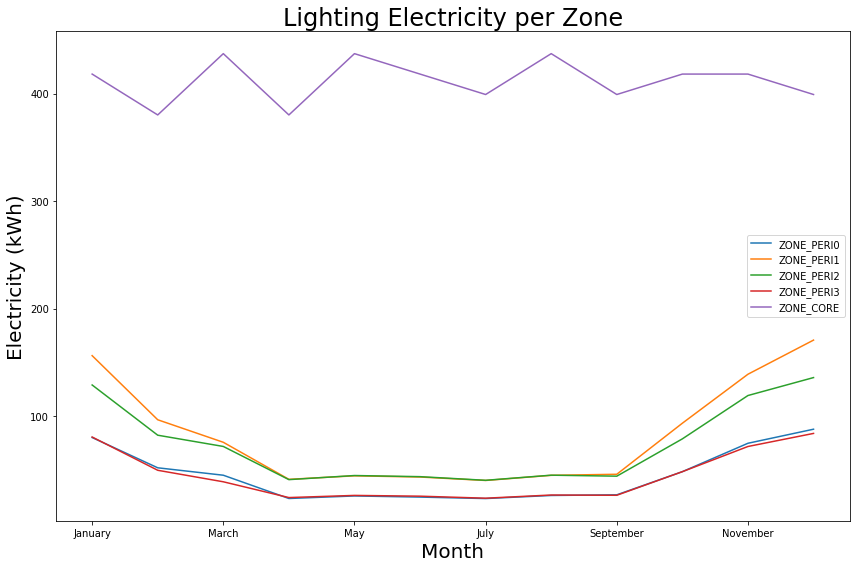

In [56]:
ZoneLighting.plot(figsize=(12,8))

plt.title("Lighting Electricity per Zone",fontsize = 24)
plt.xlabel('Month', fontsize = 20)
plt.ylabel("Electricity (kWh)",fontsize = 20)

plt.tight_layout()
plt.show()

In [57]:
## Define your customized plot function
def VisBarPlotByAX(ax, xData, width=0.5, offset=0, color = "purple", title = 'title', YLable="YLable" , path="", axLine1 = 0, axLine2 = 0,label='Heating' ):
    if(offset !=0):
        yTime = [i+offset for i in range(0,len(xData))]     
    else:
        yTime = [i for i in range(0,len(xData))]

    ax.bar(Result["Date/Time"],xData,width=width, alpha=0.5, color=color,label=label)
    ax.set_title(title,fontsize = 24)
    ax.set_xlabel('Month',fontsize = 20)
    ax.set_ylabel(YLable,fontsize = 20)
    ax.legend(loc='best')
    if(axLine1 != 0 and axLine2 != 0 ):
        ax.set_axhline(axLine1, color='r', label=r'True $\beta_1$')
        ax.set_axhline(axLine2, color='r', label=r'True $\beta_1$')
        ax.set_axhspan(axLine1, axLine2, facecolor='0.5', alpha=0.5,label=r'True $\beta_1$')

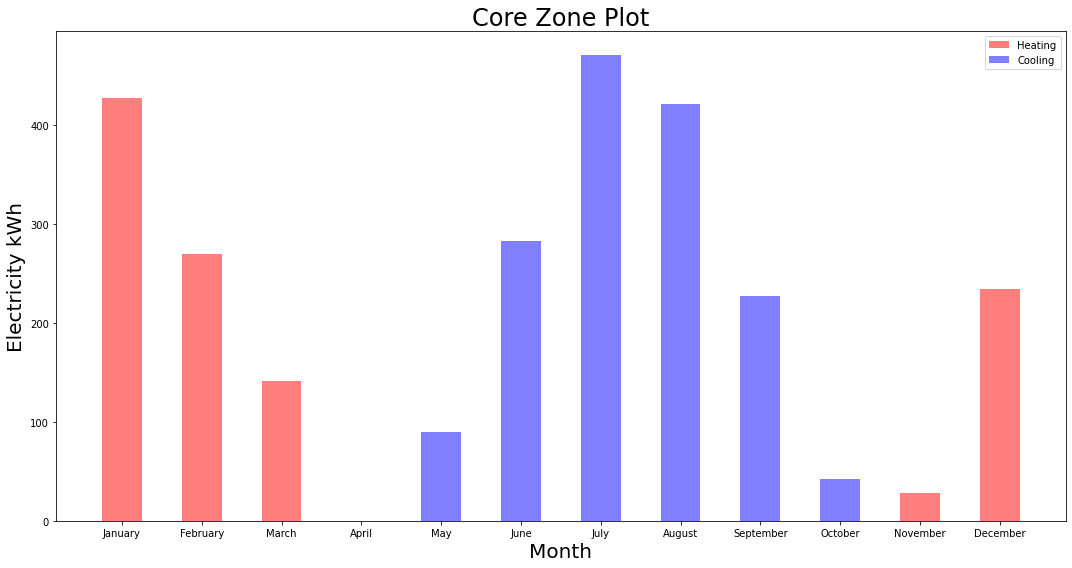

In [59]:
## Visuzlization
# 'ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)',
#        'ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly) '

## Set two variables to visualize 
bar1 = Result['ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Monthly)']/3600000
bar2 = Result['ZONE_CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Cooling Energy [J](Monthly) ']/3600000

ind=Result["Date/Time"]
width =0.2

path = "barChartPlot"
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

VisBarPlotByAX(ax, bar1, width = 0.5, color="red", YLable="Electricity kWh",label='Heating', title = "Core Zone Plot")
VisBarPlotByAX(ax, bar2, width=0.5,offset=0.2, color="blue", YLable="Electricity kWh",label='Cooling', title = "Core Zone Plot")


plt.savefig(path)
plt.tight_layout()
plt.show()